In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [2]:
import matplotlib.pyplot as plt
#from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
import pandas_datareader as prd
import pandas_datareader.data as web
import yfinance as yf

In [4]:
from datetime import datetime

In [5]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [6]:
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [7]:
for stock in tech_list:   
    globals()[stock] = yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [8]:
AAPL

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-02,171.220001,174.300003,170.929993,173.750000,172.865417,52164500
2023-10-03,172.259995,173.630005,170.820007,172.399994,171.522293,49594600
2023-10-04,171.089996,174.210007,170.970001,173.660004,172.775879,53020300
2023-10-05,173.789993,175.449997,172.679993,174.910004,174.019531,48527900
2023-10-06,173.800003,177.990005,173.179993,177.490005,176.586395,57224100
...,...,...,...,...,...,...
2024-09-23,227.339996,229.449997,225.809998,226.470001,226.470001,54146000
2024-09-24,228.649994,229.350006,225.729996,227.369995,227.369995,43556100
2024-09-25,224.929993,227.289993,224.020004,226.369995,226.369995,42308700


In [9]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,193.930480,195.732600,192.296480,194.127840,193.677032,5.950513e+07
std,19.932546,20.159902,19.486452,19.834215,20.021537,2.979195e+07
min,165.350006,166.399994,164.080002,165.000000,164.585999,2.404830e+07
25%,176.764999,179.057503,175.902504,178.682499,177.842461,4.458882e+07
50%,189.809998,190.930000,188.629997,189.754997,189.152222,5.277105e+07
75%,213.730003,216.580002,211.525005,213.902504,213.655205,6.529722e+07
max,236.479996,237.229996,233.089996,234.820007,234.548523,3.186799e+08


In [10]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-10-02 to 2024-09-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       250 non-null    float64
 1   High       250 non-null    float64
 2   Low        250 non-null    float64
 3   Close      250 non-null    float64
 4   Adj Close  250 non-null    float64
 5   Volume     250 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


<Axes: xlabel='Date'>

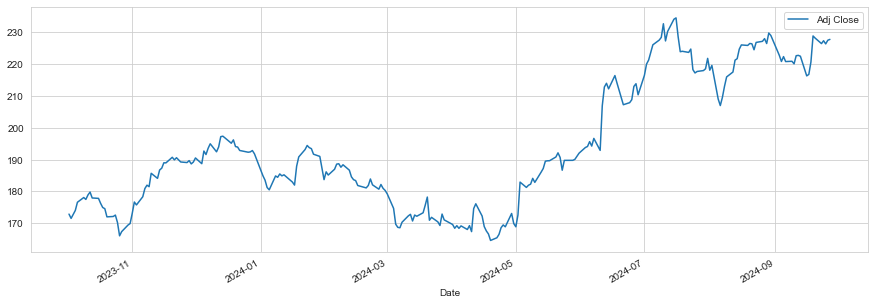

In [11]:
#changes in Aple stock price over the last year
AAPL['Adj Close'].plot(legend=True, figsize = (15,5))


<Axes: xlabel='Date'>

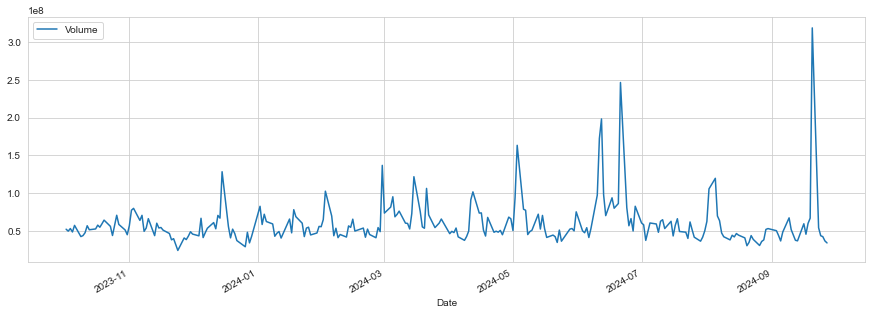

In [12]:
AAPL['Volume'].plot(legend=True,figsize = (15,5))

In [13]:
#moving averages(to identify the trend direction of a stock)
ma_day = [10,20,50]
for ma in ma_day:
    col_name = "MA for %s days" %(str(ma))
    
    AAPL[col_name] = AAPL['Adj Close'].rolling(ma).mean()

<Axes: xlabel='Date'>

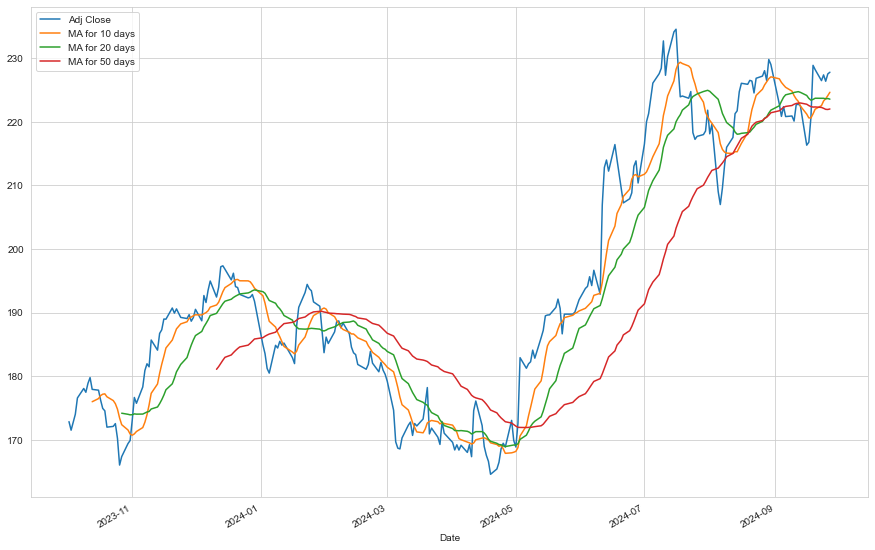

In [14]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False, figsize = (15,10))
#than bigger amount of days for movig averages than better we can identify trend

<Axes: xlabel='Date'>

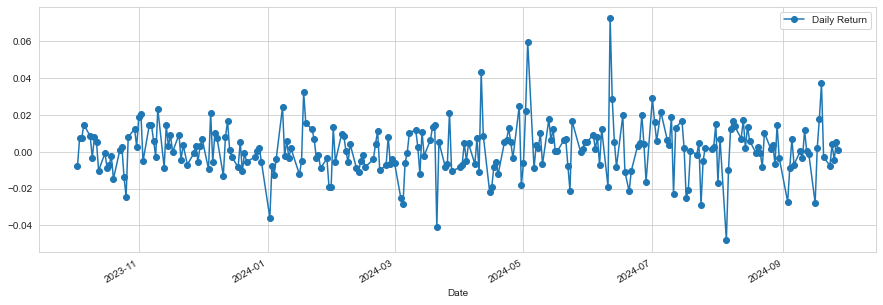

In [15]:
#% change for each date
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize = (15,5),legend=True, marker='o')



In [16]:
#difference between the lowest and the highest % change for the year (12%)
AAPL['Daily Return'].max()-AAPL['Daily Return'].min()

0.12081608936427635

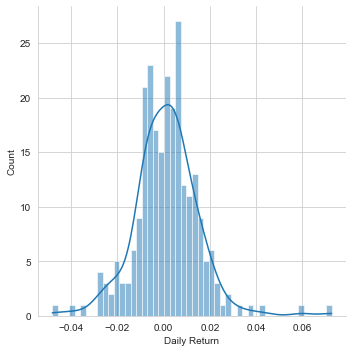

In [17]:
#avg change in stock price
sns.displot(AAPL['Daily Return'],bins=50,kde=True)

In [18]:
#download only closing price colums for all 4 stocko to compare

In [19]:
close_df = yf.download(tech_list,start,end)['Adj Close']
close_df.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-10-02,172.865417,129.460007,134.838852,319.402527
2023-10-03,171.522293,124.720001,132.973434,311.055206
2023-10-04,172.775879,127.000000,135.936172,316.583710
2023-10-05,174.019531,125.959999,135.656860,316.980713
2023-10-06,176.586395,127.959999,138.390137,324.821869


In [20]:
tech_rets = pd.DataFrame(close_df.pct_change())#get percentage change between the current and a prior value in columns 
#for each Stock
tech_rets

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-10-02,NaN,NaN,NaN,NaN
2023-10-03,-0.007770,-0.036614,-0.013834,-0.026134
2023-10-04,0.007309,0.018281,0.022281,0.017773
2023-10-05,0.007198,-0.008189,-0.002055,0.001254
2023-10-06,0.014750,0.015878,0.020148,0.024737
...,...,...,...,...
2024-09-23,-0.007581,0.011900,-0.009536,-0.004043
2024-09-24,0.003974,0.000413,0.003495,-0.010011
2024-09-25,-0.004398,-0.007373,-0.003972,0.006850


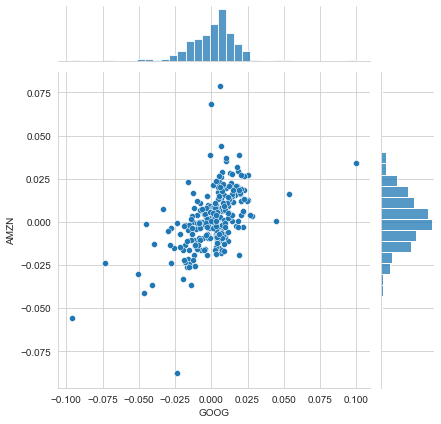

In [21]:
#positive correlation between Google and Amazon stock prices changing
sns.jointplot(x='GOOG',y='AMZN',data =tech_rets,kind = 'scatter')

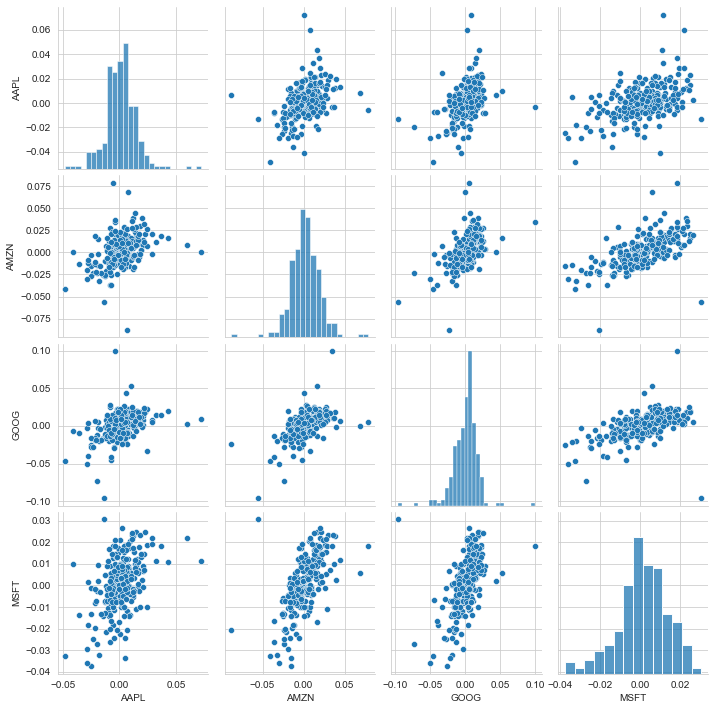

In [22]:
#which stocks correlate
sns.pairplot(data=tech_rets, dropna=True)
plt.show()

In [23]:
#there is no particullar line pattern, no correlations in price changing

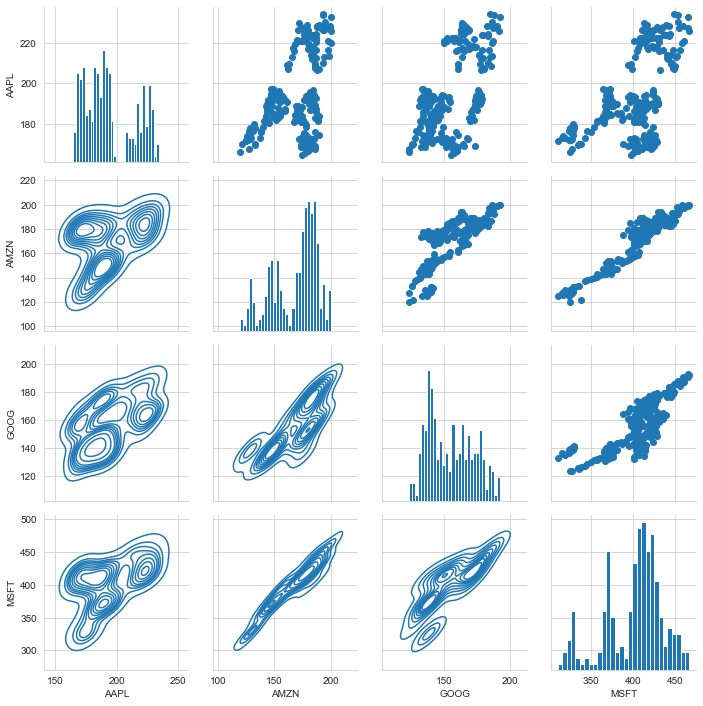

In [24]:
#correlation between closing prices 
returns_fig = sns.PairGrid(close_df.dropna())# Set up the figure by naming it returns_fig, call PairGrid on the DataFrame
returns_fig.map_upper(plt.scatter)# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_lower(sns.kdeplot)#We can also define the lower triangle in the figure, including the plot type (kde)
returns_fig.map_diag(plt.hist,bins=30)# Finally we'll define the diagonal as a series of histogram plots of the daily return
#stock has positive correlations in closing prices, AAPL has less strong correlation between other stocks

<Axes: xlabel='Ticker', ylabel='Ticker'>

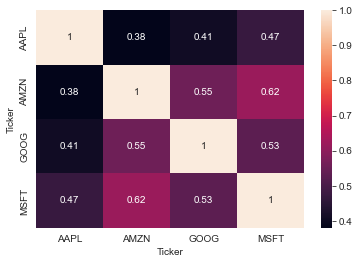

In [25]:
sns.heatmap(tech_rets.dropna().corr(),annot=True)

<Axes: xlabel='Ticker', ylabel='Ticker'>

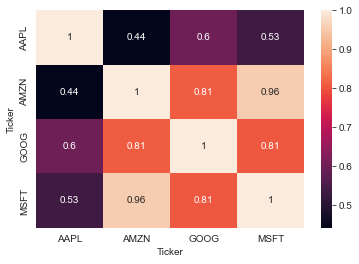

In [26]:
sns.heatmap(close_df.dropna().corr(),annot=True)

In [27]:
#Risk analysis
#expected return
rets = tech_rets.dropna()

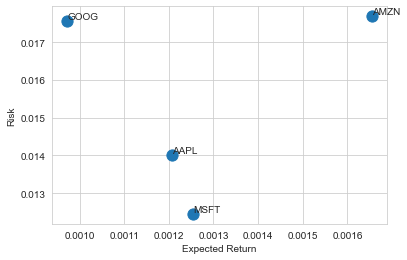

In [28]:
area = np.pi*40 # Defining the area for the circles of scatter plot to avoid tiny little points
plt.scatter(rets.mean(),rets.std(),s=area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(),rets.std()):
      plt.annotate(label, xy = (x,y), ha = 'left',va='bottom')
#we can say Google and Amazon stocks have highter risk but only Amazon has positive expected returns.
#Apple and Mirosoft have lower risk and lower expected returns than Amazon has

In [29]:
rets.head()

Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-10-03,-0.007770,-0.036614,-0.013834,-0.026134
2023-10-04,0.007309,0.018281,0.022281,0.017773
2023-10-05,0.007198,-0.008189,-0.002055,0.001254
2023-10-06,0.014750,0.015878,0.020148,0.024737
2023-10-09,0.008451,0.002344,0.005550,0.007823


In [30]:
#the 0.05 empiprical quantile of daily returns
rets ['AAPL'].quantile(0.05) #95% confidence worst daily lost will not exeed 2.2%
#If we have a 1 thousand dollar investment, our one-day 5% VaR is 0.022 * 1,000 = $22

-0.021330968433241095

In [31]:
rets ['GOOG'].quantile(0.05)#95% confidence worst daily lost will not exeed 2.5%

-0.02470112408068721

In [32]:
rets ['AMZN'].quantile(0.05)#95% confidence worst daily lost will not exeed 2.4%

-0.02409402798551441

In [33]:
rets ['MSFT'].quantile(0.05)#95% confidence worst daily lost will not exeed 2.1%

-0.021195240680355408

In [34]:
#Value at Risk using the Monte Carlo method
#Using the Monte Carlo to run many trials with random market conditions,
#then we'll calculate portfolio losses for each trial. After this, 
#we'll use the aggregation of all these simulations to establish how risky the stock is
days = 365
dt= 1/days#change of time(delta)
mu = rets.mean()['GOOG']#mean average return
sigma = rets.std()['GOOG']#standart deviation of average return

In [35]:

def  stock_monte_carlo(start_price,days,mu,sigma):
     # Define a price array
    price = np.zeros(days)#create array with 365 zeros 
    price[0] = start_price#first value start price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    # Run price array for number of days
    for x in range(1,days):
        shock[x]=np.random.normal(loc=mu*dt,scale=sigma*np.sqrt(dt))# Calculate Schock
        drift[x] = mu*dt #average daily return multiplied by the change of time
        price[x] =  price[x-1]+(price[x-1]*(drift[x]+shock[x]))# Calculate Price
    return price     
    

In [36]:
GOOG.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-02,132.154999,135.360001,132.065002,135.169998,134.838852,19210400
2023-10-03,134.929993,135.240005,132.815002,133.300003,132.973434,19628700
2023-10-04,133.660004,136.570007,133.429993,136.270004,135.936172,22848000
2023-10-05,136.130005,136.500000,134.455002,135.990005,135.656860,15922900
2023-10-06,134.940002,139.186005,134.940002,138.729996,138.390137,20819300


Text(0.5, 1.0, 'Montecarlo analysis for google')

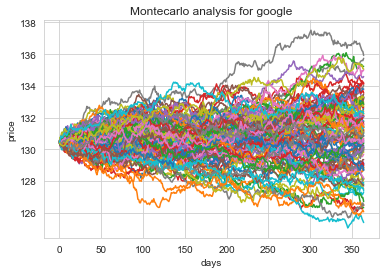

In [37]:
start_price=130.449997

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('days')
plt.ylabel('price')
plt.title('Montecarlo analysis for google')

In [38]:
#histogram of the end results for a much larger run. 
runs = 1000
simulations = np.zeros(runs)# Create an empty matrix to hold the end price data
for run in range(runs):
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]
    #every run in the simulation is gonna be defined as the end price

In [47]:
#we have array of simulations 
q = np.percentile(simulations,1)#define q ad the 1% empirical quantile,99% of the values should fit within output

Text(0.5, 1.0, 'Final price distribution for google stock after 365 days')

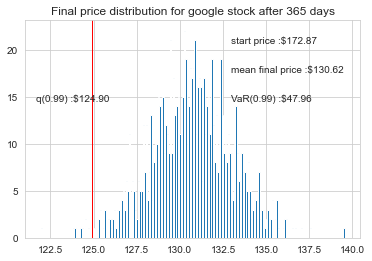

In [48]:
#plot the distribution of the end prices
plt.hist(simulations,bins=200)
# Using plt.figtext to fill in some additional information onto the plot
plt.figtext(0.6,0.8, s = 'start price :$%.2F' %start_price)
plt.figtext(0.6,0.7, s = 'mean final price :$%.2F' %simulations.mean())
# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s = 'VaR(0.99) :$%.2F' %(start_price - q))#value of risk
# To display 1% quantile
plt.figtext(0.15,0.6, s = 'q(0.99) :$%.2F' %q)
# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=1, color='r')
plt.title('Final price distribution for google stock after %s days' % days)

In [49]:
#for every initial GOOGL stock you purchase you're putting about $4.27
#at risk 99% of the time from our Monte Carlo Simulation

In [50]:
#for Apple stock
AAPL.head()

,Open,High,Low,Close,Adj Close,Volume,MA for 10 days,MA for 20 days,MA for 50 days,Daily Return
Date,,,,,,,,,,
2023-10-02,171.220001,174.300003,170.929993,173.750000,172.865417,52164500,NaN,NaN,NaN,NaN
2023-10-03,172.259995,173.630005,170.820007,172.399994,171.522293,49594600,NaN,NaN,NaN,-0.007770
2023-10-04,171.089996,174.210007,170.970001,173.660004,172.775879,53020300,NaN,NaN,NaN,0.007309
2023-10-05,173.789993,175.449997,172.679993,174.910004,174.019531,48527900,NaN,NaN,NaN,0.007198
2023-10-06,173.800003,177.990005,173.179993,177.490005,176.586395,57224100,NaN,NaN,NaN,0.014750


Text(0.5, 1.0, 'Montecarlo analysis for Apple')

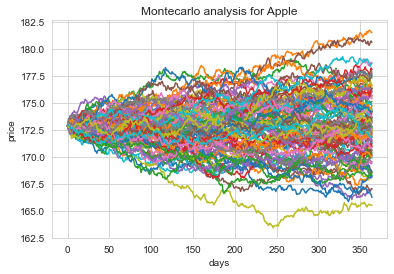

In [51]:
start_price=172.865417

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('days')
plt.ylabel('price')
plt.title('Montecarlo analysis for Apple')

In [52]:
#histogram of the end results for a much larger run. 
runs = 1000
simulations = np.zeros(runs)# Create an empty matrix to hold the end price data
for run in range(runs):
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]
    #every run in the simulation is gonna be defined as the end price

In [53]:
#we have array of simulations 
q = np.percentile(simulations,1)#define q ad the 1% empirical quantile,99% of the values should fit within output

Text(0.5, 1.0, 'Final price distribution for google stock after 365 days')

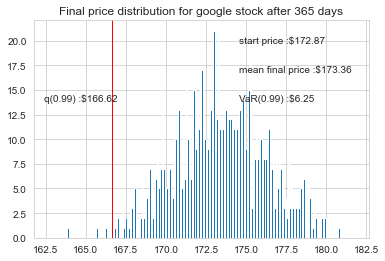

In [54]:
#plot the distribution of the end prices
plt.hist(simulations,bins=200)
# Using plt.figtext to fill in some additional information onto the plot
plt.figtext(0.6,0.8, s = 'start price :$%.2F' %start_price)
plt.figtext(0.6,0.7, s = 'mean final price :$%.2F' %simulations.mean())
# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s = 'VaR(0.99) :$%.2F' %(start_price - q))#value of risk
# To display 1% quantile
plt.figtext(0.15,0.6, s = 'q(0.99) :$%.2F' %q)
# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=1, color='r')
plt.title('Final price distribution for google stock after %s days' % days)

In [55]:
#for every initial AAPL stock you purchase you're putting about $6.25
#at risk 99% of the time from our Monte Carlo Simulation

In [56]:
#for Microsoft stock
MSFT.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-02,316.279999,321.890015,315.179993,321.799988,319.402496,20570000
2023-10-03,320.829987,321.390015,311.209991,313.390015,311.055206,21033500
2023-10-04,314.029999,320.040009,314.000000,318.959991,316.583710,20720100
2023-10-05,319.089996,319.980011,314.899994,319.359985,316.980713,16965600
2023-10-06,316.549988,329.190002,316.299988,327.260010,324.821899,25645500


Text(0.5, 1.0, 'Montecarlo analysis for Apple')

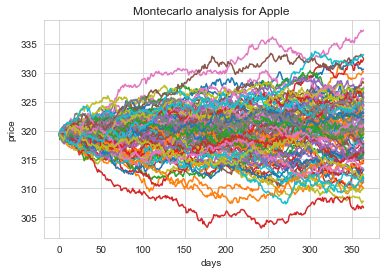

In [57]:
start_price=319.402496

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('days')
plt.ylabel('price')
plt.title('Montecarlo analysis for Apple')

In [59]:
#histogram of the end results for a much larger run. 
runs = 1000
simulations = np.zeros(runs)# Create an empty matrix to hold the end price data
for run in range(runs):
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]
    #every run in the simulation is gonna be defined as the end price

In [60]:
#we have array of simulations 
q = np.percentile(simulations,1)#define q ad the 1% empirical quantile,99% of the values should fit within output

Text(0.5, 1.0, 'Final price distribution for google stock after 365 days')

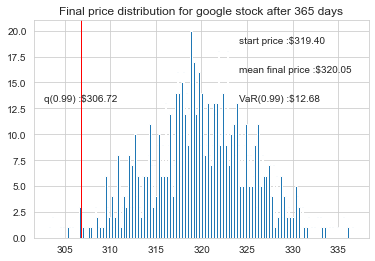

In [61]:
#plot the distribution of the end prices
plt.hist(simulations,bins=200)
# Using plt.figtext to fill in some additional information onto the plot
plt.figtext(0.6,0.8, s = 'start price :$%.2F' %start_price)
plt.figtext(0.6,0.7, s = 'mean final price :$%.2F' %simulations.mean())
# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s = 'VaR(0.99) :$%.2F' %(start_price - q))#value of risk
# To display 1% quantile
plt.figtext(0.15,0.6, s = 'q(0.99) :$%.2F' %q)
# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=1, color='r')
plt.title('Final price distribution for google stock after %s days' % days)

In [62]:
#for every initial Microsof stock you purchase you're putting about $12.68
#at risk 99% of the time from our Monte Carlo Simulation

In [63]:
AMZN.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-10-02,127.279999,130.470001,126.540001,129.460007,129.460007,48029700
2023-10-03,128.059998,128.520004,124.250000,124.720001,124.720001,51565000
2023-10-04,126.059998,127.360001,125.680000,127.000000,127.000000,44203900
2023-10-05,126.709999,126.730003,124.330002,125.959999,125.959999,39660600
2023-10-06,124.160004,128.449997,124.129997,127.959999,127.959999,46795900


Text(0.5, 1.0, 'Montecarlo analysis for Apple')

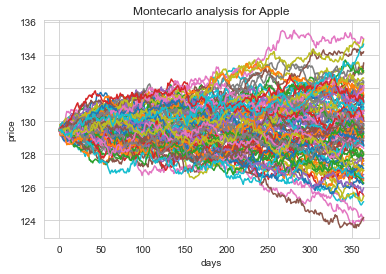

In [64]:
start_price=129.460007

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel('days')
plt.ylabel('price')
plt.title('Montecarlo analysis for Apple')

In [65]:
#histogram of the end results for a much larger run. 
runs = 1000
simulations = np.zeros(runs)# Create an empty matrix to hold the end price data
for run in range(runs):
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]
    #every run in the simulation is gonna be defined as the end price

In [66]:
#we have array of simulations 
q = np.percentile(simulations,1)#define q ad the 1% empirical quantile,99% of the values should fit within output

Text(0.5, 1.0, 'Final price distribution for google stock after 365 days')

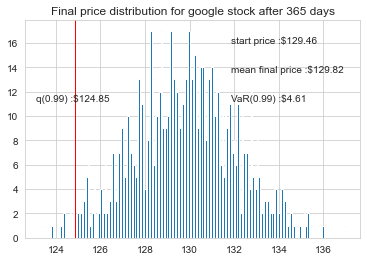

In [67]:
#plot the distribution of the end prices
plt.hist(simulations,bins=200)
# Using plt.figtext to fill in some additional information onto the plot
plt.figtext(0.6,0.8, s = 'start price :$%.2F' %start_price)
plt.figtext(0.6,0.7, s = 'mean final price :$%.2F' %simulations.mean())
# Variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6, s = 'VaR(0.99) :$%.2F' %(start_price - q))#value of risk
# To display 1% quantile
plt.figtext(0.15,0.6, s = 'q(0.99) :$%.2F' %q)
# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=1, color='r')
plt.title('Final price distribution for google stock after %s days' % days)

In [ ]:
#for every initial Microsof stock you purchase you're putting about $4.61
#at risk 99% of the time from our Monte Carlo Simulation